<div style="
    background: linear-gradient(to bottom, #6f937a, #e8e8e8);
    color: black;
    padding: 16px;
    border-radius: 6px;
    margin: 18px 0;
">

# D8.1 Advanced Topic A — Taylor Expansions
 
</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D8.1.1 Why Taylor expansions matter in physics


Taylor expansions are not just a theoretical tool, they sit quietly underneath **almost all modern computation in physics**.

When you press buttons on a **calculator** or ask a **computer** to evaluate functions like $\sin x$, $\cos x$, $e^x$, or $\ln x$, the device is *not* using exact formulas in the mathematical sense. Instead, it evaluates carefully chosen **Taylor polynomials** (or closely related polynomial/rational approximations) to compute these values with high accuracy.

In other words:
> **Every time you compute a transcendental function numerically, you are using Taylor polynomials.**

---

Taylor expansions are equally fundamental in **numerical physics**.

Many numerical methods are *derived* by expanding functions in Taylor series and then:
- Truncating higher-order terms
- Estimating how errors propagate

Examples, some of which we will encounter later:
- Finite-difference formulas for derivatives  
- Numerical integration rules  
- Time-stepping methods for differential equations  

At their core, these methods rely on the fact that **local behavior of a function is encoded in its derivatives**.

---

From a physics perspective, Taylor expansions explain *why simple models work*:

Near equilibrium or for small deviations:
- Nonlinear forces become linear
- Complicated potentials become quadratic
- Motion becomes approximately harmonic

This is not an accident—it is a direct consequence of truncating a Taylor expansion at low order.

---

**Big idea:**  
Taylor expansions connect
- physical intuition,
- analytical approximations,
- numerical computation,
- and real-world measurement.

They are the bridge between exact mathematics and usable physics.


---

In physics, we often encounter functions that are **difficult or impossible to work with exactly**, but behave in a simple and predictable way **near a particular point**.  
Taylor expansions give us a systematic way to replace a complicated function with a **polynomial approximation** that is:

- Easier to evaluate
- Easier to differentiate and integrate
- Often *physically transparent*

Much of physics—oscillations, waves, thermodynamics, optics, quantum mechanics, and numerical methods—relies on the idea that **local behavior matters more than global complexity**.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D8.1.2 The basic idea

Suppose we have a function $f(x)$ and we want to understand its behavior **near a point $x = a$**.

We ask:
- What is the value of the function at $a$?
- What is its slope at $a$?
- How does the slope itself change near $a$?
- And so on…

Each derivative adds more local information.

---

### First-order (linear) approximation

The simplest approximation keeps only the value and slope:

$$
f(x) \approx f(a) + f'(a)(x - a)
$$

This is just the **tangent line** to the function at $x = a$.

- Accurate when $(x-a)$ is small
- Widely used in error analysis and small-perturbation physics


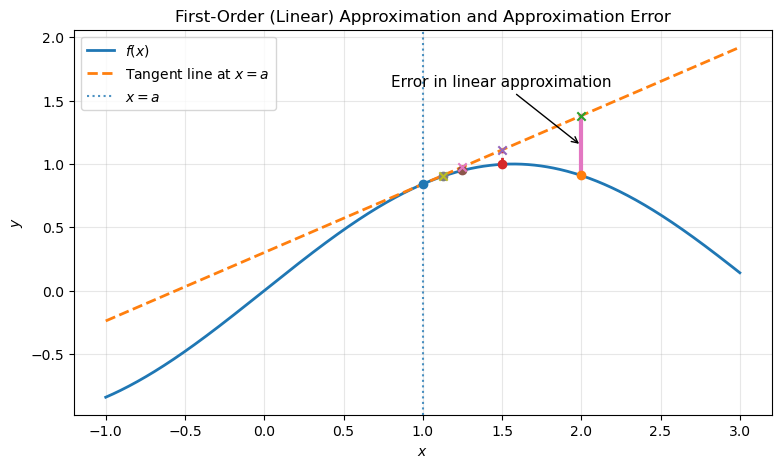

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Define the function and its derivative
# ----------------------------------------------------
def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

# Expansion point
a = 1.0

# Domain
x = np.linspace(a - 2, a + 2, 600)

# Tangent line at x = a
tangent = f(a) + df(a) * (x - a)

# Sample points
h_values = [1.0, 0.5, 0.25, 0.125]
x_samples = [a + h for h in h_values]

# ----------------------------------------------------
# Plot
# ----------------------------------------------------
plt.figure(figsize=(9, 5))

# Main curves
plt.plot(x, f(x), linewidth=2, label=r"$f(x)$")
plt.plot(x, tangent, "--", linewidth=2, label=r"Tangent line at $x=a$")

# Expansion point
plt.scatter(a, f(a), zorder=5)
plt.axvline(a, linestyle=":", alpha=0.8, label=r"$x=a$")

# Sample points and errors
for xs in x_samples:
    y_true = f(xs)
    y_lin = f(a) + df(a) * (xs - a)

    plt.scatter(xs, y_true, zorder=5)
    plt.scatter(xs, y_lin, marker="x", zorder=5)
    plt.plot([xs, xs], [y_lin, y_true], linestyle=":", linewidth=2)

# ----------------------------------------------------
# Highlight the error at x = 0
# ----------------------------------------------------
x_err = 2.0
y_true_err = f(x_err)
y_lin_err = f(a) + df(a) * (x_err - a)

# Emphasize the error segment
plt.plot([x_err, x_err], [y_lin_err, y_true_err],
         linewidth=3)

# Arrow and annotation
plt.annotate(
    r"Error in linear approximation",
    xy=(x_err, 0.5*(y_true_err + y_lin_err)),
    xytext=(x_err - 1.2, y_true_err + 0.7),
    arrowprops=dict(arrowstyle="->"),
    fontsize=11
)

# Labels and styling
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("First-Order (Linear) Approximation and Approximation Error")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


**As $x$ approaches $a$, the error in the linear (first-order) approximation becomes smaller and smaller.**  
This is evident in the plot: points closer to $x=a$ show a much smaller vertical separation between the true function value $f(x)$ and the tangent-line approximation.  
The tangent line is therefore a good approximation only **locally**, when $|x-a|$ is small.


---

### Second-order (quadratic) approximation

Including curvature gives:

$$
f(x) \approx f(a) + f'(a)(x - a) + \frac{1}{2} f''(a)(x - a)^2
$$

Now the approximation captures:
- Local value
- Local slope
- Local curvature

This is often enough to describe **stable equilibria**, small oscillations, and harmonic motion.

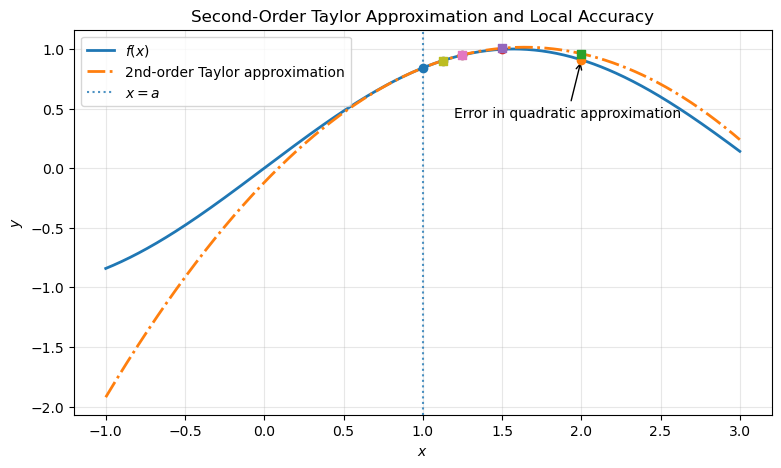

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Define the function and its derivatives
# ----------------------------------------------------
def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def d2f(x):
    return -np.sin(x)

# Expansion point
a = 1.0

# Domain
x = np.linspace(a - 2, a + 2, 600)

# Second-order Taylor approximation
quadratic = f(a) + df(a) * (x - a) + 0.5 * d2f(a) * (x - a)**2

# Sample points
h_values = [1.0, 0.5, 0.25, 0.125]
x_samples = [a + h for h in h_values]

# ----------------------------------------------------
# Plot
# ----------------------------------------------------
plt.figure(figsize=(9, 5))

plt.plot(x, f(x), linewidth=2, label=r"$f(x)$")
plt.plot(x, quadratic, "-.", linewidth=2, label=r"2nd-order Taylor approximation")

plt.scatter(a, f(a), zorder=5)
plt.axvline(a, linestyle=":", alpha=0.8, label=r"$x=a$")

# Sample points and errors
for xs in x_samples:
    y_true = f(xs)
    y_quad = f(a) + df(a) * (xs - a) + 0.5 * d2f(a) * (xs - a)**2

    plt.scatter(xs, y_true, zorder=5)
    plt.scatter(xs, y_quad, marker="s", zorder=5)
    plt.plot([xs, xs], [y_quad, y_true], linestyle=":", linewidth=3)

# ----------------------------------------------------
# Highlight error at x = 0 (arrow points upward)
# ----------------------------------------------------
x_err = 2.0
y_true_err = f(x_err)
y_quad_err = f(a) + df(a) * (x_err - a) + 0.5 * d2f(a) * (x_err - a)**2

plt.plot([x_err, x_err], [y_quad_err, y_true_err], linewidth=4)

plt.annotate(
    r"Error in quadratic approximation",
    xy=(x_err, y_true_err),
    xytext=(x_err-0.8, y_quad_err-0.5),
    arrowprops=dict(arrowstyle="->"),
    ha="left",
    va="center"
)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Second-Order Taylor Approximation and Local Accuracy")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


Including the second-order (quadratic) term dramatically improves the approximation compared to the linearized (first-order) version, reducing the error over a much wider range of $x$ values.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D8.1.3 The Taylor series: definition and meaning

The **Taylor series** of a function $f(x)$ about the point $x=a$ is an infinite sum that reconstructs the function using information from its derivatives evaluated at $a$.

In compact (summation) form, the Taylor series is defined as

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
$$

Here:
- $f^{(n)}(a)$ is the $n$th derivative of $f(x)$ evaluated at $x=a$
- $n!$ is the factorial, which naturally appears when repeatedly differentiating powers of $(x-a)$
- $(x-a)^n$ measures how far we are from the expansion point

---

### Taylor series written out explicitly

Writing out the first few terms makes the structure clear:

$$
f(x) = f(a)
+ f'(a)(x-a)
+ \frac{1}{2}f''(a)(x-a)^2
+ \frac{1}{6}f'''(a)(x-a)^3
+ \cdots
$$

Each term adds a new layer of local information:
- The **first term** fixes the value at $x=a$
- The **second term** fixes the slope at $x=a$
- The **third term** fixes the curvature at $x=a$
- Higher-order terms correct finer details

---

### Smoothness and infinite derivatives

For a Taylor series to exist in this form, the function must be **sufficiently smooth** near $x=a$.

In practice, this means:
- The function has derivatives of all orders at $x=a$
- These derivatives are finite and well-behaved

Such functions are often described as having **infinitely many derivatives** at the expansion point.  
Most functions used in physics—polynomials, exponentials, trigonometric functions—satisfy this requirement.

---

### Convergence

A Taylor series contains infinitely many terms, but its usefulness depends on **convergence**.

Convergence means that adding more terms causes the series to approach the true function:
> Each successive term becomes smaller and contributes less to the total.

This happens because each term contains a power of

$$
\Delta x = x-a.
$$

When $|\Delta x| \ll 1$:
- $(\Delta x)^2 \ll \Delta x$
- $(\Delta x)^3 \ll (\Delta x)^2$

Each higher-order term is suppressed by an additional factor of $\Delta x$, often reducing its contribution by roughly an order of magnitude.

---

### Physical interpretation

From a physics perspective, the Taylor series expresses a fundamental idea:

> **Local behavior dominates when deviations are small.**

Near equilibrium or for small perturbations:
- Linear terms dominate first
- Quadratic terms correct curvature
- Higher-order terms rapidly become negligible

This hierarchy explains why low-order Taylor polynomials work so well in physics and why higher-order corrections systematically improve accuracy.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D8.1.4 Special case: Maclaurin series

If we expand about $a = 0$, the Taylor series is called a **Maclaurin series**:

$$
f(x) = f(0)
+ f'(0)x
+ \frac{1}{2!}f''(0)x^2
+ \frac{1}{3!}f'''(0)x^3
+ \cdots
$$

Many standard physics approximations use Maclaurin series.

<div style="background-color:#e0f2f1; border-left:6px solid #00695c; padding:14px; border-radius:4px; margin-top:16px;">
<h3 style="margin-top:0; color:#000000;">Example — Taylor Series for cos x (Maclaurin Expansion)</h3>

We will build a Taylor series approximation for the cosine function.  
Because cosine is smooth and has derivatives of all orders, it is an ideal example.

We choose to expand about

$$
a=0,
$$

which produces a <strong>Maclaurin series</strong> (a Taylor series about $x=0$).

<br>

<strong>Step 1: Write the Taylor series template</strong><br>

The Taylor series of $f(x)$ about $x=a$ is

$$
f(x)=f(a)+f'(a)(x-a)+\frac{1}{2}f''(a)(x-a)^2+\frac{1}{6}f'''(a)(x-a)^3+\cdots
$$

For a Maclaurin series ($a=0$), this becomes

$$
f(x)=f(0)+f'(0)x+\frac{1}{2}f''(0)x^2+\frac{1}{6}f'''(0)x^3+\cdots
$$

Here we set $f(x)=\cos x$.

<br>

<strong>Step 2: Compute derivatives and evaluate at $x=0$</strong><br>

Start with the function and its derivatives:

$$
f(x)=\cos x
$$

$$
f'(x)=-\sin x
$$

$$
f''(x)=-\cos x
$$

$$
f'''(x)=\sin x
$$

$$
f^{(4)}(x)=\cos x
$$

Now evaluate each derivative at $x=0$:

$$
f(0)=\cos 0=1
$$

$$
f'(0)=-\sin 0=0
$$

$$
f''(0)=-\cos 0=-1
$$

$$
f'''(0)=\sin 0=0
$$

$$
f^{(4)}(0)=\cos 0=1
$$

Notice the pattern: at $x=0$ the odd-derivative terms vanish because $\sin 0=0$.

<br>

<strong>Step 3: Substitute into the series</strong><br>

Putting these values into the Maclaurin form gives:

$$
\cos x
= 1 + (0)x + \frac{1}{2}(-1)x^2 + \frac{1}{6}(0)x^3 + \frac{1}{24}(1)x^4 + \cdots
$$

Simplifying:

$$
\boxed{\cos x = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots}
$$


<br>

<strong>Interpretation</strong><br>

If $|x|$ is small (for example $|x| \ll 1$ rad), then higher powers like $x^4$, $x^6$, ... become very small.  
That means we can truncate the series to get a useful approximation:

First-order approximation:

$$
\cos x \approx 1
$$

Second-order (quadratic) approximation:
$$
\cos x \approx 1-\frac{x^2}{2}
$$

Fourth-order approximation:
$$
\cos x \approx 1-\frac{x^2}{2}+\frac{x^4}{24}
$$

The approximation improves as we include more terms, especially near $x=0$.

<br>

<strong>Key takeaway</strong><br>

The cosine function can be replaced near $x=0$ by a polynomial whose coefficients come directly from derivatives at the expansion point:

- the value $\cos 0$ sets the constant term,
- the curvature (second derivative) produces the $x^2$ term,
- higher derivatives generate higher powers.

This is why calculators and numerical algorithms can compute $\cos x$ efficiently: they evaluate a polynomial approximation whose accuracy improves as more terms are included.
</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 1 — Taylor Series for sin x</h3>

In this activity, you will construct the **Taylor (Maclaurin) series** for the sine function and interpret its physical meaning for small angles.

<strong>Task:</strong>

We will expand the sine function about

$$
a = 0,
$$

which produces a <strong>Maclaurin series</strong>.

Answer the following questions.

1. Compute the first four derivatives of $\sin x$.  
2. Evaluate each derivative at $x=0$.  
3. Use these values to construct the Taylor series for $\sin x$.  
4. Identify which terms vanish and explain why.  
5. Explain why the approximation $\sin x \approx x$ is valid for small angles.

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
A Possible Solution Guide
</summary>

<strong>Step 1: Derivatives of $\sin x$</strong>

$$
f(x) = \sin x
$$

$$
f'(x) = \cos x
$$

$$
f''(x) = -\sin x
$$

$$
f'''(x) = -\cos x
$$

$$
f^{(4)}(x) = \sin x
$$

The derivatives repeat in a cycle of four.

<br>

<strong>Step 2: Evaluate at $x=0$</strong>

$$
f(0) = \sin 0 = 0
$$

$$
f'(0) = \cos 0 = 1
$$

$$
f''(0) = -\sin 0 = 0
$$

$$
f'''(0) = -\cos 0 = -1
$$

All even-derivative terms vanish at $x=0$.

<br>

<strong>Step 3: Construct the Taylor series</strong>

Start from the Maclaurin expansion:

$$
f(x) = f(0) + f'(0)x + \frac{1}{2}f''(0)x^2 + \frac{1}{6}f'''(0)x^3 + \cdots
$$

Substitute the values:

$$
\sin x = 0 + (1)x + \frac{1}{2}(0)x^2 + \frac{1}{6}(-1)x^3 + \cdots
$$

Simplifying:

$$
\boxed{\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots}
$$

<br>

<strong>Step 4: Small-angle interpretation</strong>

When $|x| \ll 1$ (measured in radians), higher powers of $x$ become very small.  
Keeping only the first term gives the **small-angle approximation**:

$$
\sin x \approx x
$$

This approximation underlies many physical models involving oscillations, waves, and rotational motion.

<br>

<strong>Key takeaway</strong>

The Taylor series shows that near $x=0$, the sine function behaves almost like a straight line.  
Higher-order terms provide systematic corrections, but for small angles the linear term dominates.
</details>

</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 2 — Taylor Series for e^x</h3>

In this activity, you will construct the **Taylor (Maclaurin) series** for the exponential function and interpret why it is so computationally useful.

<strong>Task:</strong>

We will expand the exponential function about

$$
a = 0,
$$

which produces a <strong>Maclaurin series</strong>.

Answer the following questions.

1. Compute the first four derivatives of $e^x$.  
2. Evaluate each derivative at $x=0$.  
3. Use these values to construct the Taylor series for $e^x$.  
4. Write out the first four nonzero terms explicitly.  
5. Explain why truncating the series gives a good approximation when $|x|$ is small.

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
A Possible Solution Guide
</summary>

<strong>Step 1: Derivatives of $e^x$</strong>

Let

$$
f(x)=e^x.
$$

Differentiate:

$$
f'(x)=e^x,
\qquad
f''(x)=e^x,
\qquad
f'''(x)=e^x,
\qquad
f^{(4)}(x)=e^x.
$$

A remarkable property of the exponential is that **every derivative equals the original function**.

<br>

<strong>Step 2: Evaluate at $x=0$</strong>

Since $e^0=1$:

$$
f(0)=1,\quad f'(0)=1,\quad f''(0)=1,\quad f'''(0)=1,\quad \ldots
$$

So all derivative values at the expansion point are the same.

<br>

<strong>Step 3: Construct the Taylor series</strong>

Start from the Maclaurin expansion:

$$
f(x)=f(0)+f'(0)x+\frac{1}{2}f''(0)x^2+\frac{1}{6}f'''(0)x^3+\cdots
$$

Substitute $f^{(n)}(0)=1$ for all $n$:

$$
\boxed{e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots}
$$

<br>

<strong>Key takeaway</strong>

The exponential function is special because its derivatives never change form.  
This leads to a particularly simple Taylor series:

$$
e^x \approx 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}
$$

for small $|x|$, with higher-order terms providing systematic improvements.
</details>

</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 3 — Plot the First Five Taylor Polynomials for cos x</h3>

In this activity, you will visualize how Taylor polynomials converge to $\cos x$ near the expansion point.  
You will plot $\cos x$ along with the first five <strong>nonzero</strong> Maclaurin polynomials (about $a=0$).

<strong>Task:</strong>

1. Plot the true function $f(x)=\cos x$.  
2. Plot the first five successive nonzero Taylor polynomials:

   $$P_0(x),\ P_2(x),\ P_4(x),\ P_6(x),\ P_8(x).$$

3. Use the plot to answer:
   - Near $x=0$, how does the agreement improve as you include higher-order terms?
   - Far from $x=0$, what do you notice about the polynomial behavior compared to $\cos x$?

Run the code below, then experiment by changing the x-range (for example from $[-1,1]$ to $[-4,4]$).

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
A Possible Solution Guide
</summary>

<strong>Key idea</strong><br>

The Maclaurin series for cosine is

$$
\cos x = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} - \cdots
$$

So the successive nonzero Taylor polynomials are:

$$
P_0(x)=1
$$

$$
P_2(x)=1-\frac{x^2}{2!}
$$

$$
P_4(x)=1-\frac{x^2}{2!}+\frac{x^4}{4!}
$$

$$
P_6(x)=1-\frac{x^2}{2!}+\frac{x^4}{4!}-\frac{x^6}{6!}
$$

$$
P_8(x)=1-\frac{x^2}{2!}+\frac{x^4}{4!}-\frac{x^6}{6!}+\frac{x^8}{8!}
$$

As you add terms, the approximation improves near $x=0$ because higher powers of $x$ are small there.  
Far from $0$, the polynomial terms can grow rapidly, so the approximation may worsen outside the local region of validity.
</details>

</div>


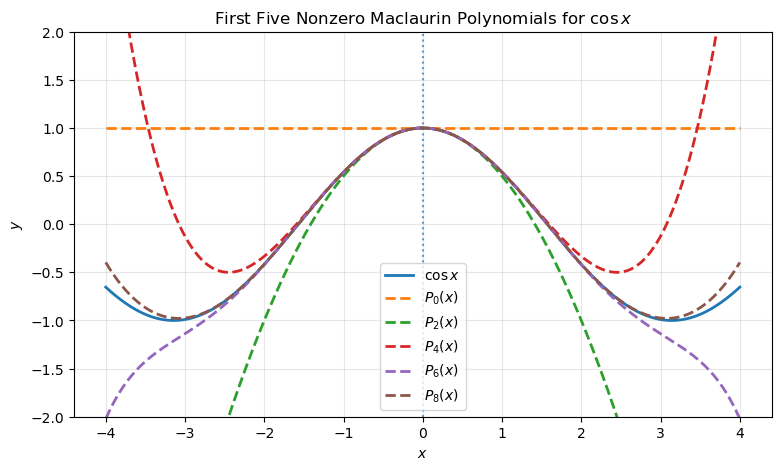

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# ----------------------------
# Settings students can change
# ----------------------------
x_min, x_max = -4, 4          # try -1,1 first, then widen the interval
N_points = 800

# ----------------------------
# Domain and true function
# ----------------------------
x = np.linspace(x_min, x_max, N_points)
f = np.cos(x)

# ----------------------------
# Build the first five nonzero Maclaurin polynomials for cos(x):
# P0, P2, P4, P6, P8
# ----------------------------
orders = [0, 2, 4, 6, 8]
polys = {}

for n in orders:
    # P_n includes terms up to x^n, but only even powers appear for cos(x)
    Pn = np.zeros_like(x, dtype=float)
    for k in range(0, n//2 + 1):
        power = 2*k
        coeff = ((-1)**k) / factorial(power)
        Pn += coeff * x**power
    polys[n] = Pn

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(9, 5))

plt.plot(x, f, linewidth=2, label=r"$\cos x$")

for n in orders:
    plt.plot(x, polys[n], linewidth=2, linestyle="--", label=rf"$P_{n}(x)$")

plt.axvline(0, linestyle=":", alpha=0.7)
plt.ylim(-2, 2)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"First Five Nonzero Maclaurin Polynomials for $\cos x$")
plt.grid(alpha=0.3)
plt.legend()
plt.show()



<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D8.1.5 Truncation and approximation error

In practice, we do not use the full infinite Taylor series. Instead, we **truncate** the series after a finite number of terms.

Writing the Taylor expansion about $x=a$ explicitly, we have

$$
f(x)
= f(a)
+ f'(a)(x-a)
+ \frac{1}{2}f''(a)(x-a)^2
+ \frac{1}{6}f'''(a)(x-a)^3
+ \cdots
$$

If we keep terms only up to order $(x-a)^N$, then the approximation becomes

$$
f(x) \approx
f(a)
+ f'(a)(x-a)
+ \frac{1}{2}f''(a)(x-a)^2
+ \cdots
+ \frac{1}{N!}f^{(N)}(a)(x-a)^N.
$$

All remaining higher-order terms are neglected. We call this the **Taylor Polynomial**.

---

### Estimating the error (physicist’s viewpoint)

When the series is convergent and the terms are decreasing in size, the **first neglected term** sets the scale of the error.

If the series is truncated after the $(x-a)^N$ term, the next term would be

$$
\frac{1}{(N+1)!}f^{(N+1)}(a)(x-a)^{N+1}.
$$

A physicist therefore estimates the approximation error as

$$
\boxed{
\text{error scale}
\;\sim\;
\left|\frac{1}{(N+1)!}f^{(N+1)}(a)(x-a)^{N+1}\right|
}
$$

This estimate tells you:
- how accurate the approximation is,
- whether additional terms are needed,
- and how the error grows as $x$ moves away from $a$.

---

### Accuracy versus simplicity

Truncation always involves a tradeoff:

- **Keeping more terms** improves accuracy but adds complexity.
- **Keeping fewer terms** simplifies the physics but limits the range of validity.

In physics, the goal is usually not maximum accuracy, but **sufficient accuracy with maximum insight**.

---

### When approximations break down

A Taylor approximation breaks down when:
- $|x-a|$ is no longer small,
- higher-order terms are no longer negligible,
- or the function is not smooth near $x=a$.

Understanding *when* an approximation fails is just as important as knowing how to apply it.

<div style="background-color:#e0f2f1; border-left:6px solid #00695c; padding:14px; border-radius:4px; margin-top:16px;">
<h3 style="margin-top:0; color:#000000;">Example — Estimating Taylor Approximation Error for $\sin x$ (Including Percent Error)</h3>

In this example, we illustrate how the <strong>first neglected term</strong> in a Taylor expansion provides a reliable estimate of the approximation error — both in absolute terms and as a percentage.

We expand the sine function about

$$
a = 0,
$$

so we use a <strong>Maclaurin series</strong>.

<br>

<strong>Step 1: Taylor expansion of $\sin x$</strong><br>

The Taylor series for $\sin x$ is

$$
\sin x
= x
- \frac{x^3}{3!}
+ \frac{x^5}{5!}
- \cdots
$$

Keeping only the first (linear) term gives the familiar small-angle approximation:

$$
\sin x \approx x.
$$

<br>

<strong>Step 2: First neglected term and error estimate</strong><br>

The first omitted term is

$$
-\frac{x^3}{3!} = -\frac{x^3}{6}.
$$

When the series terms decrease in magnitude, this term sets the scale of the error:

$$
\text{absolute error} \sim \left|\frac{x^3}{6}\right|.
$$

<br>

<strong>Step 3: Numerical evaluation</strong><br>

Let

$$
x = 0.2 \ \text{rad}.
$$

Estimated error from the Taylor series:

$$
\left|\frac{(0.2)^3}{6}\right|
= \frac{0.008}{6}
\approx 1.3\times10^{-3}.
$$

Exact value:

$$
\sin(0.2) \approx 0.19867.
$$

Approximate value:

$$
\sin x \approx x = 0.20000.
$$

Actual absolute error:

$$
|\sin(0.2) - 0.2| \approx 1.33\times10^{-3}.
$$

<br>

<strong>Step 4: Percent error</strong><br>

The percent error is defined as

$$
\text{percent error}
= \frac{|\text{approximate} - \text{exact}|}{|\text{exact}|}\times 100\%.
$$

Substituting values:

$$
\text{percent error}
= \frac{1.33\times10^{-3}}{0.19867}\times 100\%
\approx 0.67\%.
$$

<br>

<strong>Interpretation</strong><br>

A percent error well below 1% confirms that the small-angle approximation is very accurate for $x=0.2$ rad.  
More importantly, the <em>error magnitude was correctly predicted</em> by the first neglected Taylor term.

<br>

<strong>Key takeaway</strong><br>

Taylor expansions provide both:
- an efficient approximation, and
- a built-in estimate of accuracy.

When terms decrease in size,

$$
\boxed{\text{error scale} \approx \text{first neglected term}}
$$

and this estimate can be converted directly into a meaningful percent error.
</div>



<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D8.1.6 Physical interpretation

Taylor expansions formalize a central idea in physics:

> **Most systems behave simply when deviations are small.**

Near equilibrium:
- Forces become linear
- Potentials become quadratic
- Motion becomes harmonic

Taylor expansions will appear naturally when we:
- Linearize equations of motion
- Approximate potentials
- Derive numerical methods
- Understand why simple models work so well

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D8.1.7  Takeaway

Taylor expansions are not just a mathematical trick. They are a **lens through which physics becomes understandable**—turning complexity into structure, one derivative at a time.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">
